In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot as plt
import seaborn

In [3]:
HOME_PATH = '' #home path of the project
FILENAME = 'E_PimaIndiansDiabetes_Data_Real.csv'

## 1. Load the dataset

In [4]:
dataset = pd.read_csv(HOME_PATH + FILENAME)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 2. Analyze data

In [5]:
categorical_cols = ['Outcome']
categorical_cols

['Outcome']

In [6]:
#dimensions of the dataset
dataset.shape

(768, 9)

In [7]:
#data types of each attribute
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
#peak of the data
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
#summarize the distribution of each attribute
set_option('precision', 2)
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


## 3. Data visualization

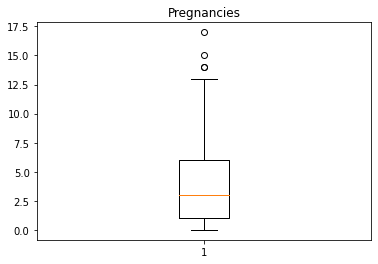

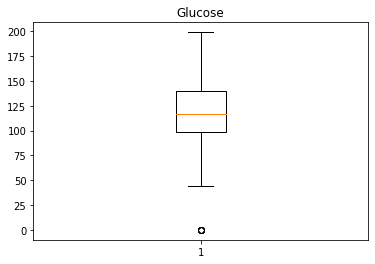

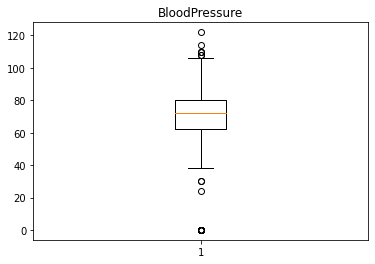

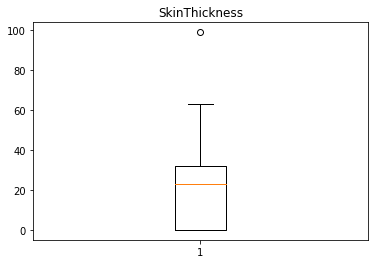

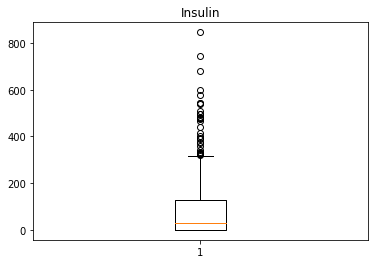

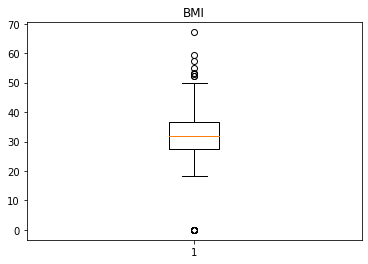

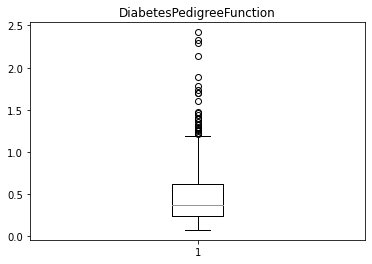

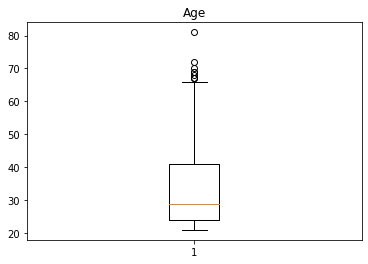

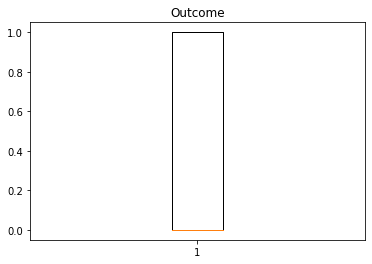

In [10]:
for col in dataset.columns :
    # Multiple box plots on one Axes
    data = dataset[col]
    if col in categorical_cols :
        data = data.astype("category").cat.codes
    fig, ax = plt.subplots()
    ax.boxplot(data)
    ax.set_title(col)

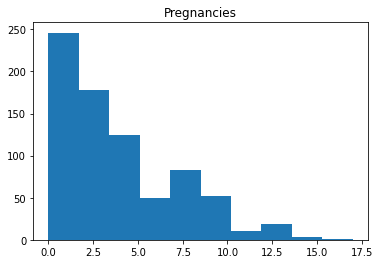

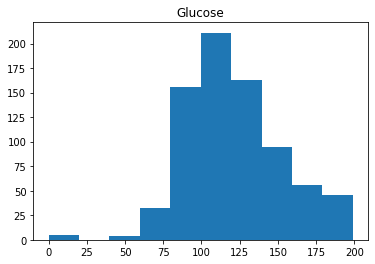

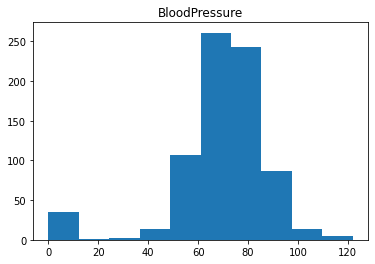

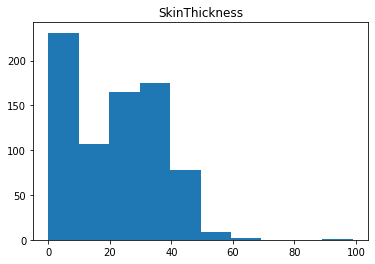

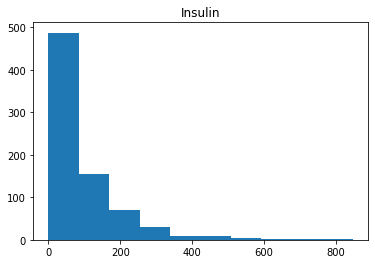

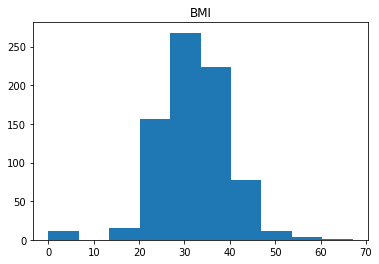

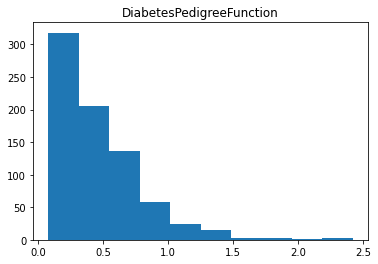

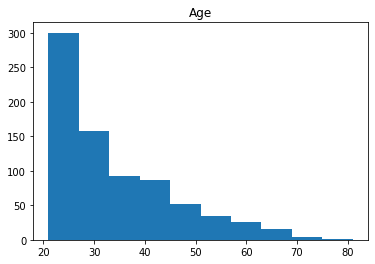

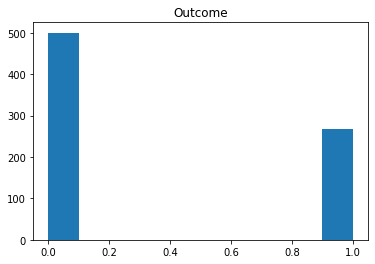

In [11]:
for col in dataset.columns :
    # Multiple box plots on one Axes
    data = dataset[col]
    if col in categorical_cols :
        data = data.astype("category").cat.codes
    fig, ax = plt.subplots()
    ax.hist(data, density=False, histtype='bar')
    ax.set_title(col)

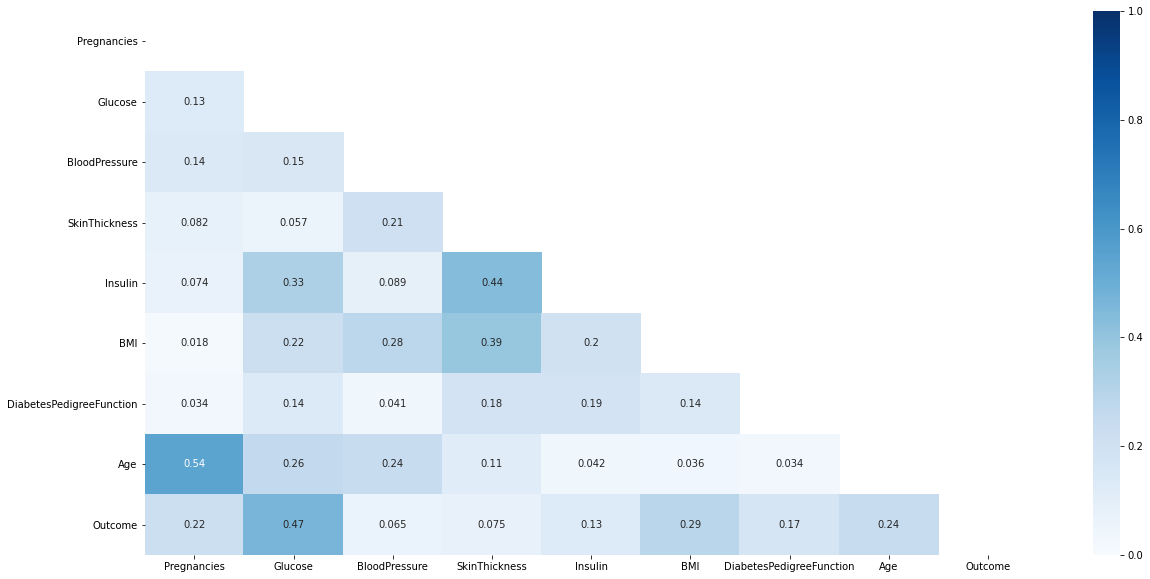

In [12]:
#Correlation matrix
set_option('precision', 2)
pyplot.figure(figsize=(20,10))
cors = abs(dataset.corr(method='pearson'))
seaborn.heatmap(cors, mask=np.triu(np.ones_like(cors, dtype=bool)), cmap='Blues', vmin=0, vmax=1, annot=True)
pyplot.show()

## 4. Edit data

In [13]:
for col in dataset.columns :
    if not dataset[col].isnull().values.any() :
        print(col, ':', 'NO NaN values')
    else :
        print(col, ':', 'NaN values finded')
        print('Number of NaN values: ', dataset[col].isnull().sum())

Pregnancies : NO NaN values
Glucose : NO NaN values
BloodPressure : NO NaN values
SkinThickness : NO NaN values
Insulin : NO NaN values
BMI : NO NaN values
DiabetesPedigreeFunction : NO NaN values
Age : NO NaN values
Outcome : NO NaN values


In [14]:
#quick look at the breakdown of class values
for col in categorical_cols :
    dataset[col] = dataset[col].astype('category')
    print('###########################')
    print(dataset.groupby(col).size())

###########################
Outcome
0    500
1    268
dtype: int64


## 5. Data split (train and test)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#Split data indixes in train and test
idx_train, idx_test = train_test_split(dataset.index.tolist(), train_size=0.8, random_state=42, shuffle=True)
print('Train data length: ', len(idx_train))
print('Test data length: ', len(idx_test))
print('Total data length: ', len(idx_train) + len(idx_test))

Train data length:  614
Test data length:  154
Total data length:  768


In [17]:
#Select train data and save locally
diabetes_train_data = dataset.loc[idx_train]
diabetes_train_data.to_csv(HOME_PATH + 'TRAIN DATASETS/E_PimaIndiansDiabetes_Real_Train.csv', index=False)
#Select test data and save locally
diabetes_test_data = dataset.loc[idx_test]
diabetes_test_data.to_csv(HOME_PATH + 'TEST DATASETS/E_PimaIndiansDiabetes_Real_Test.csv', index=False)
print('Train data size: ', diabetes_train_data.shape)
print('Test data length: ', diabetes_test_data.shape)

Train data size:  (614, 9)
Test data length:  (154, 9)
